In [30]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils import get_train_results, add_scatterplot, add_history_plot
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

model_name = 'cnn'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [24]:
y_test_k01, predictions_k01, history_k01 = get_train_results(model_name, "k0.1")
y_test_k05, predictions_k05, history_k05 = get_train_results(model_name, "k0.5")
y_test_k5, predictions_k5, history_k5 = get_train_results(model_name, "k5.0")
y_test_k10, predictions_k10, history_k10 = get_train_results(model_name, "k10.0")

# Plot

k=0.1: pearson coefs= 0.9999974738571351
k=0.5: pearson coefs= 0.9999994361805383
k=5.0: pearson coefs= 0.9999992631785601
k=10.0: pearson coefs= 0.9999991272308936


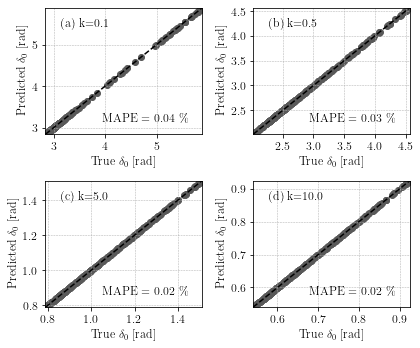

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

print('k=0.1: pearson coefs=', stats.pearsonr(y_test_k01, predictions_k01)[0])
add_scatterplot(axs, (0, 0), y_test_k01, predictions_k01, str_label='(a) k=0.1', nticks=6)

print('k=0.5: pearson coefs=', stats.pearsonr(y_test_k05, predictions_k05)[0])
add_scatterplot(axs, (0, 1), y_test_k05, predictions_k05, str_label='(b) k=0.5', nticks=6)

print('k=5.0: pearson coefs=', stats.pearsonr(y_test_k5, predictions_k5)[0])
add_scatterplot(axs, (1, 0), y_test_k5, predictions_k5, str_label='(c) k=5.0', nticks=6)

print('k=10.0: pearson coefs=', stats.pearsonr(y_test_k10, predictions_k10)[0])
add_scatterplot(axs, (1, 1), y_test_k10, predictions_k10, str_label='(d) k=10.0', nticks=6)

plt.tight_layout()
plt.savefig('output/'+model_name+'/yukawa_scatter.pdf', format='pdf')
plt.show()

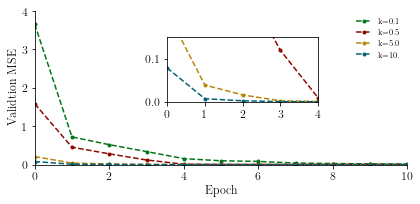

In [42]:
plt.style.use('seaborn-dark-palette') 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(history_k01['loss'], label='k=0.1', marker='.', linestyle='dashed', color=colors[1])
ax.plot(history_k05['loss'], label='k=0.5', marker='.', linestyle='dashed', color=colors[2])
ax.plot(history_k5['loss'], label='k=5.0', marker='.', linestyle='dashed', color=colors[4])
ax.plot(history_k10['loss'], label='k=10.', marker='.', linestyle='dashed', color=colors[5])

ax2 = fig.add_axes([0.4, 0.5, 0.35, 0.3])
ax2.plot(history_k01['loss'], label='k=0.1', marker='.', linestyle='dashed', color=colors[1])
ax2.plot(history_k05['loss'], label='k=0.5', marker='.', linestyle='dashed', color=colors[2])
ax2.plot(history_k5['loss'], label='k=5.0', marker='.', linestyle='dashed', color=colors[4])
ax2.plot(history_k10['loss'], label='k=10.', marker='.', linestyle='dashed', color=colors[5])
ax2.set_xlim(0, 4)
ax2.set_ylim(0, 0.15)
ax2.axhline(y=0, color='grey', linestyle='--', linewidth=0.8)

ax.set_ylabel('Validtion MSE')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right', frameon=False)
ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.8)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.set_xlim(0, 10)
ax.set_ylim(0, 4)

plt.tight_layout()
plt.grid(False)
plt.savefig('output/'+model_name+'/yukawa_history.pdf', format='pdf')
plt.show()
